In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#From Jose
gene = pd.read_excel('gene_expression_table4.xlsx')
del gene['Unnamed: 9']
# deleted column without any content
#append each column except the first column which is the gene ID
just_expression=gene.iloc[0:373,3:15]
just_expression


,5,2,6,4,3,1,1.1,5.1,3.1,2.1,6.1,4.1
0,3373.5,3757.8,3380.3,4560.2,4682.9,4182.9,5050.6,5820.5,4527.5,4886.4,5419.0,5304.3
1,1383.0,1501.8,1599.8,1433.7,1359.0,1565.5,1264.8,1285.5,1228.7,1134.7,1221.3,1383.8
2,864.7,1184.6,1465.4,1387.8,1414.6,1589.6,1847.7,2322.5,2966.6,2562.3,2107.0,2436.6
3,721.8,940.9,907.6,975.7,865.1,803.3,1417.6,995.4,1650.5,1348.6,1193.1,1645.0
4,419.0,389.1,390.7,356.1,452.8,400.2,866.8,580.3,637.7,554.6,590.9,601.4
5,575.4,439.0,496.2,549.3,667.7,588.9,741.2,661.5,821.5,719.3,741.2,909.9
6,85.9,191.7,113.9,67.4,71.8,89.9,219.8,256.2,267.4,205.3,196.4,283.4
7,959.6,1083.6,1162.8,1130.0,1088.6,1326.4,1484.5,1677.5,1838.5,1402.2,1516.2,2089.5
8,1273.6,1216.4,1254.3,1150.1,1242.5,1153.8,1424.4,1736.1,1548.4,1198.5,1764.5,1619.7
9,4634.5,3749.6,4443.9,3844.0,4063.3,3896.4,3717.0,3725.6,3466.5,3102.8,3601.7,3419.0


In [3]:
JEflip = just_expression.transpose()
JEflip

JEflipar = JEflip.values
JEflipar

array([[ 3373.5,  1383. ,   864.7, ...,   399.1,   292.2,   260.7],
       [ 3757.8,  1501.8,  1184.6, ...,   452.6,   274.4,   495.6],
       [ 3380.3,  1599.8,  1465.4, ...,   484.8,   293.9,   397.6],
       ..., 
       [ 4886.4,  1134.7,  2562.3, ...,   795. ,   731.3,   617.8],
       [ 5419. ,  1221.3,  2107. , ...,   825.2,   588.6,   636.7],
       [ 5304.3,  1383.8,  2436.6, ...,   865.5,   667.7,   658.8]])

In [4]:
#Making a new array to label gene expression under low or high BRCA1 (rows in JEflip)
brca = np.array(['BRCA1-','BRCA1-','BRCA1-','BRCA1-','BRCA1-','BRCA1-',
         'BRCA1+','BRCA1+','BRCA1+','BRCA1+','BRCA1+','BRCA1+'])

In [5]:
from sklearn.decomposition import PCA

In [6]:
JEflip_pca = PCA()
JEflippc = JEflip_pca.fit_transform(JEflipar) # 12x12 matrix

5 components are need to explain 90% of the variance


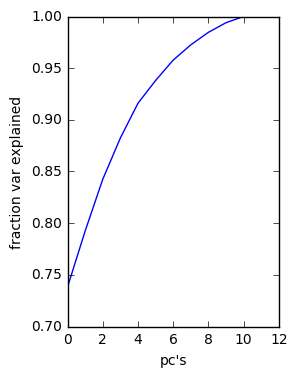

In [7]:
fg = plt.figure()


fg.add_subplot(1,2,1)
plt.plot(np.cumsum(JEflip_pca.explained_variance_ratio_))
plt.xlabel("pc's")
plt.ylabel('fraction var explained')


JEvar = JEflip_pca.explained_variance_ratio_
cumvar = np.cumsum(JEvar) 
for i in range (12):
    if cumvar[i] >= 0.9:
        print (i+1, 'components are need to explain 90% of the variance')
        break
        
# 5 of the 12 PCs needed to explain 90% of the variance
# but the first PC already explains more than 75% of the variance

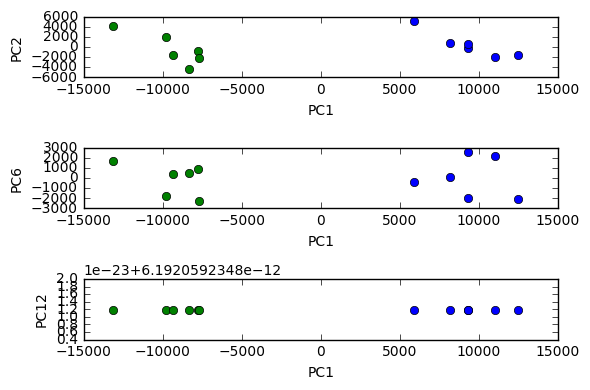

In [8]:
# Plot function from homework 5 key

fg = plt.figure()

fg.add_subplot(3,1,1)
for c in np.unique(brca):
    plt.plot(JEflippc[brca==c,0], 
             JEflippc[brca==c,1], 'o')
plt.xlabel('PC1')    
plt.ylabel('PC2')

fg.add_subplot(3,1,2)
for c in np.unique(brca):
    plt.plot(JEflippc[brca==c,0], 
             JEflippc[brca==c,5], 'o')
plt.xlabel('PC1')    
plt.ylabel('PC6')

fg.add_subplot(3,1,3)
for c in np.unique(brca):
    plt.plot(JEflippc[brca==c,0], 
             JEflippc[brca==c,11], 'o')
plt.xlabel('PC1')    
plt.ylabel('PC12')

plt.tight_layout()

#When the indiviual PCs are compoared with the first PC, always a clear separation into 
#2 groups of 6 samples - corresponds to BRCA1+ or BRCA1-.
#Here example of 3

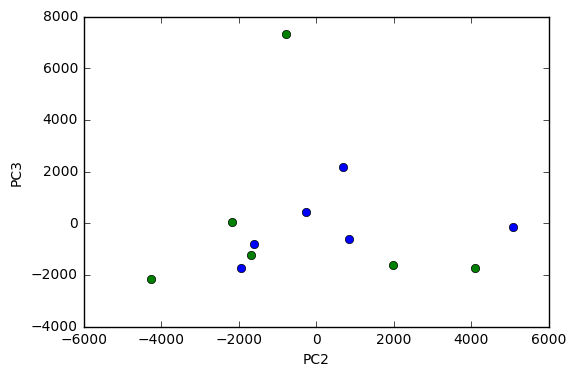

In [9]:
#Function from homework 5 key

for c in np.unique(brca):
    plt.plot(JEflippc[brca==c,1], 
             JEflippc[brca==c,2], 'o')
plt.xlabel('PC2')    
plt.ylabel('PC3')

# When compared between other PCs that are not the first PC, less clear separation

In [10]:
def test_train_id (N, test_frac):
    test = np.random.choice(np.arange(0, N), size = (np.floor(N * test_frac)), replace = False, p = None)
    train = np.setdiff1d(np.arange(0,N), test)
    return train, test

In [11]:
# Function from homework 5 key 

from sklearn.decomposition import PCA

def cross_val_class_accuracy(model, X, y, r, test_frac, reps):
    JEflip_pca = PCA()
    
    score = np.array([])
    for i in range(reps):
        train, test = test_train_id(y.size, test_frac)
        y_train = y[train]
        y_test = y[test]
        
        X_train = JEflip_pca.fit_transform(X[train, :])[:, :r]
        X_test = JEflip_pca.transform(X[test, :])[:, :r]
        
        model.fit(X_train, y_train)
        
        pred = model.predict(X_test)
        this_score = sum(pred == y_test) / len(y_test)
        
        score = np.append(score, this_score)
    return score

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [13]:
score = cross_val_class_accuracy(LinearDiscriminantAnalysis(), JEflipar, 
                                brca, 10, 0.2, 200)
print(score.mean())

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.5225


In [14]:
testfrac = 1/6 
reps = 200

lda_r5_scores = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          JEflipar, brca, 5,
                                          testfrac, reps)
lda_r10_scores = cross_val_class_accuracy(LinearDiscriminantAnalysis(), 
                                          JEflipar, brca, 10,
                                          testfrac, reps)
knn2_scores = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=2),
                                       JEflipar, brca, 10,
                                       testfrac, reps)
knn10_scores = cross_val_class_accuracy(KNeighborsClassifier(n_neighbors=10),
                                       JEflipar, brca, 10,
                                        testfrac, reps)
svm_scores = cross_val_class_accuracy(svm.SVC(kernel='linear'),
                                      JEflipar, brca, 10, 
                                      testfrac, reps)
tree_scores = cross_val_class_accuracy(DecisionTreeClassifier(max_depth=3),
                                       JEflipar, brca, 10,
                                       testfrac, reps)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


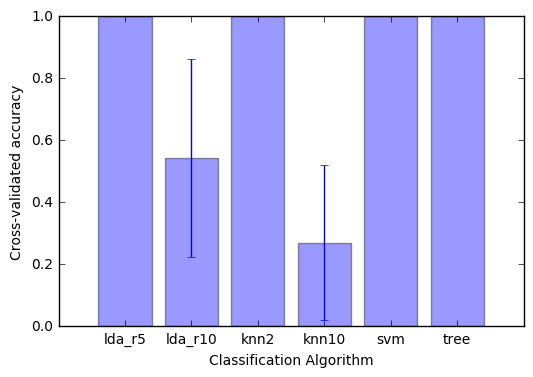

In [16]:
classifiers = ('lda_r5', 'lda_r10', 'knn2', 'knn10', 'svm', 'tree')
scores = [lda_r5_scores.mean(), lda_r10_scores.mean(), 
          knn2_scores.mean(), knn10_scores.mean(),
         svm_scores.mean(), tree_scores.mean()]
scores_err = [lda_r5_scores.std(), lda_r10_scores.std(), 
          knn2_scores.std(), knn10_scores.std(),
         svm_scores.std(), tree_scores.std()]


plt.bar(range(len(classifiers)), scores, 
        yerr=scores_err,
        align='center', alpha=0.4,)
plt.xticks(range(len(classifiers)), classifiers)
plt.ylabel('Cross-validated accuracy')
plt.xlabel('Classification Algorithm')